# Final Project

## Metric

## Datasets

In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
#https://data.wprdc.org/dataset/city-of-pittsburgh-signalized-intersections
trafficLights = pd.read_csv("https://data.wprdc.org/datastore/dump/79ddcc74-33d2-4735-9b95-4169c7d0413d")

In [ ]:
#https://data.wprdc.org/dataset/city-traffic-signs

In [3]:
trafficLights

,id,name,description,flash_time,flash_yellow,operation_type,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1233506574,TS1,Aiken Ave - Baum Blvd,24 Hr stop and go,NaN,Fully Actuated,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.456941,-79.938539
1,322808398,TS10,Alexander St - Steuben St,24 Hr stop and go,NaN,Semi Actuated,West End,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.441993,-80.034544
2,1626189126,TS100,Beeler St - Forbes Ave,24 Hr stop and go,NaN,Semi Actuated,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.443890,-79.938799
3,2085487046,TS101,Beeler St - Wilkins Ave,00:00 - 06:00,NaN,Fixed,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.445636,-79.931220
4,1187990770,TS102,Bellefield Ave - Fifth Ave,24 Hr stop and go,FIFTH AVE,Fixed,North Oakland,8.0,4.0,4.200304e+10,3.0,4.0,4.0,2-7,40.446484,-79.951914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,994278722,TS9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,1113074895,TSF153,Shady Alder RRFB,NaN,NaN,NaN,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,40.456814,-79.922437
776,1150087908,TS718,Butler St - 39th St,NaN,NaN,NaN,Lower Lawrenceville,7.0,6.0,4.200306e+10,2.0,6.0,2.0,3-3,40.467554,-79.963717
777,1741138031,TS723,NaN,NaN,NaN,NaN,Strip District,7.0,2.0,4.200302e+10,6.0,2.0,2.0,2-3,40.448705,-79.989339


## Water Features

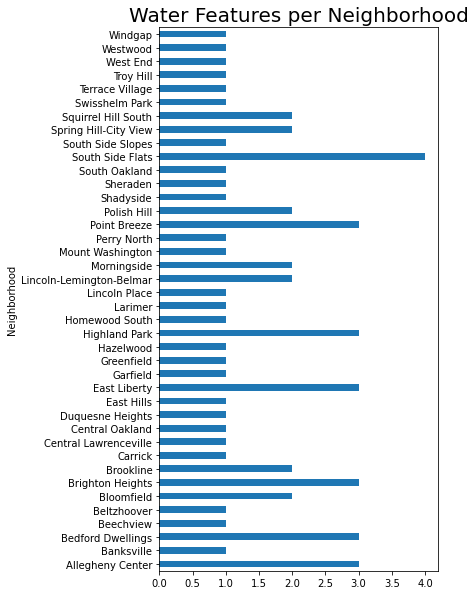

In [59]:
#https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7
waterFeatures = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
#Filter out only spray parks
query_mask = waterFeatures["feature_type"] != "Drinking Fountain"
waterDecor = waterFeatures[query_mask]
#List of neighborhoods in the dataset
neighborhoods = waterDecor['neighborhood'].unique()
#Get number of fountains per neighborhood
waterDecor = waterDecor['neighborhood'].value_counts()
waterDecor = waterDecor.to_frame()

#https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a
waterPools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
#List of negihborhoods in the dataset
neighborhoods = waterPools['neighborhood'].unique()
#Get number of water features per neighborhood
waterPools = waterPools['neighborhood'].value_counts()
waterPools = waterPools.to_frame()
#Concatenate the two datasets to get the sum of all relevant water features
water = [waterDecor, waterPools]
water = pd.concat(water)
#Get rid of duplicate indices and sort values
water = water.groupby(level=0).sum()
water.sort_values(by = "neighborhood")
#Plot 
water = water.plot(kind = "barh", figsize = (5,10), title = "Water Features per Neighborhood", fontsize = 10, ylabel = "Neighborhood", legend = False)
water.axes.title.set_size(20)
